## Initial Data Exploration

In [283]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import statsmodels.api as sm

In [284]:
housing_data = pd.read_csv('House_Sales.csv')

In [285]:
housing_data.head()

,REF_DATE,GEO,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1981-01,Canada,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,NaN,NaN,1
1,1981-01,Canada,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,NaN,NaN,1
2,1981-01,Canada,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,NaN,NaN,1
3,1981-01,Atlantic Region,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,NaN,NaN,1
4,1981-01,Atlantic Region,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,NaN,NaN,1


## Dropping Unnecessary Columns 

In [287]:
# Drop the non-beneficial columns
housing_df = housing_data.drop(columns = ['UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'])
housing_df

,REF_DATE,GEO,DGUID,New housing price indexes,VECTOR,COORDINATE,VALUE
0,1981-01,Canada,2016A000011124,Total (house and land),v111955442,1.1,38.2
1,1981-01,Canada,2016A000011124,House only,v111955443,1.2,36.1
2,1981-01,Canada,2016A000011124,Land only,v111955444,1.3,40.6
3,1981-01,Atlantic Region,2016A00011,Total (house and land),v111955445,2.1,NaN
4,1981-01,Atlantic Region,2016A00011,House only,v111955446,2.2,NaN
...,...,...,...,...,...,...,...
61435,2023-08,"Vancouver, British Columbia",2011S0503933,House only,v111955557,39.2,127.6
61436,2023-08,"Vancouver, British Columbia",2011S0503933,Land only,v111955558,39.3,122.1
61437,2023-08,"Victoria, British Columbia",2011S0503935,Total (house and land),v111955559,40.1,120.7
61438,2023-08,"Victoria, British Columbia",2011S0503935,House only,v111955560,40.2,126.5


## Dropping Null Values

In [290]:
column_names=housing_df.columns
print(column_names)

Index(['REF_DATE', 'GEO', 'DGUID', 'New housing price indexes', 'VECTOR',
       'COORDINATE', 'VALUE'],
      dtype='object')


In [291]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61440 entries, 0 to 61439
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REF_DATE                   61440 non-null  object 
 1   GEO                        61440 non-null  object 
 2   DGUID                      59904 non-null  object 
 3   New housing price indexes  61440 non-null  object 
 4   VECTOR                     61440 non-null  object 
 5   COORDINATE                 61440 non-null  float64
 6   VALUE                      50614 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.3+ MB


In [292]:
housing_df.dropna(inplace=True)

In [293]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49078 entries, 0 to 61439
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   REF_DATE                   49078 non-null  object 
 1   GEO                        49078 non-null  object 
 2   DGUID                      49078 non-null  object 
 3   New housing price indexes  49078 non-null  object 
 4   VECTOR                     49078 non-null  object 
 5   COORDINATE                 49078 non-null  float64
 6   VALUE                      49078 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.0+ MB


In [294]:
# Get one hot encoding of columns B
index_df = pd.get_dummies(housing_data['GEO'])
# Drop column B as it is now encoded
housing_data = housing_data.drop('GEO',axis = 1)
# Join the encoded df
housing_data = housing_data.join(index_df)
housing_data

,REF_DATE,DGUID,New housing price indexes,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,...,"Saskatoon, Saskatchewan","Sherbrooke, Quebec","St. Catharines-Niagara, Ontario","St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba"
0,1981-01,2016A000011124,Total (house and land),"Index, 201612=100",347,units,0,v111955442,1.1,38.2,...,0,0,0,0,0,0,0,0,0,0
1,1981-01,2016A000011124,House only,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,...,0,0,0,0,0,0,0,0,0,0
2,1981-01,2016A000011124,Land only,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,...,0,0,0,0,0,0,0,0,0,0
3,1981-01,2016A00011,Total (house and land),"Index, 201612=100",347,units,0,v111955445,2.1,NaN,...,0,0,0,0,0,0,0,0,0,0
4,1981-01,2016A00011,House only,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,2023-08,2011S0503933,House only,"Index, 201612=100",347,units,0,v111955557,39.2,127.6,...,0,0,0,0,0,0,1,0,0,0
61436,2023-08,2011S0503933,Land only,"Index, 201612=100",347,units,0,v111955558,39.3,122.1,...,0,0,0,0,0,0,1,0,0,0
61437,2023-08,2011S0503935,Total (house and land),"Index, 201612=100",347,units,0,v111955559,40.1,120.7,...,0,0,0,0,0,0,0,1,0,0
61438,2023-08,2011S0503935,House only,"Index, 201612=100",347,units,0,v111955560,40.2,126.5,...,0,0,0,0,0,0,0,1,0,0


In [295]:
# Get one hot encoding of columns B
index_df = pd.get_dummies(housing_data['New housing price indexes'])
# Drop column B as it is now encoded
housing_data = housing_data.drop('New housing price indexes',axis = 1)
# Join the encoded df
housing_data = housing_data.join(index_df)
housing_data

,REF_DATE,DGUID,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,...,"St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land)
0,1981-01,2016A000011124,"Index, 201612=100",347,units,0,v111955442,1.1,38.2,NaN,...,0,0,0,0,0,0,0,0,0,1
1,1981-01,2016A000011124,"Index, 201612=100",347,units,0,v111955443,1.2,36.1,NaN,...,0,0,0,0,0,0,0,1,0,0
2,1981-01,2016A000011124,"Index, 201612=100",347,units,0,v111955444,1.3,40.6,E,...,0,0,0,0,0,0,0,0,1,0
3,1981-01,2016A00011,"Index, 201612=100",347,units,0,v111955445,2.1,NaN,..,...,0,0,0,0,0,0,0,0,0,1
4,1981-01,2016A00011,"Index, 201612=100",347,units,0,v111955446,2.2,NaN,..,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,2023-08,2011S0503933,"Index, 201612=100",347,units,0,v111955557,39.2,127.6,NaN,...,0,0,0,1,0,0,0,1,0,0
61436,2023-08,2011S0503933,"Index, 201612=100",347,units,0,v111955558,39.3,122.1,E,...,0,0,0,1,0,0,0,0,1,0
61437,2023-08,2011S0503935,"Index, 201612=100",347,units,0,v111955559,40.1,120.7,NaN,...,0,0,0,0,1,0,0,0,0,1
61438,2023-08,2011S0503935,"Index, 201612=100",347,units,0,v111955560,40.2,126.5,NaN,...,0,0,0,0,1,0,0,1,0,0


In [296]:
# Drop the non-beneficial columns
housing_data = housing_data.drop(columns = ['UOM', 'UOM_ID', 'DGUID', 'VECTOR', 'SCALAR_FACTOR', 'SCALAR_ID', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS', 'Canada'])
housing_data

,REF_DATE,COORDINATE,VALUE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario",...,"St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land)
0,1981-01,1.1,38.2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1981-01,1.2,36.1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1981-01,1.3,40.6,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1981-01,2.1,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1981-01,2.2,NaN,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,2023-08,39.2,127.6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
61436,2023-08,39.3,122.1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
61437,2023-08,40.1,120.7,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
61438,2023-08,40.2,126.5,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [301]:
housing_data.dropna(inplace=True)

In [302]:
from sklearn.model_selection import train_test_split

X = housing_data.drop(['VALUE'], axis=1)
y = housing_data['VALUE']

In [303]:
X

,REF_DATE,COORDINATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario",...,"St. John's, Newfoundland and Labrador","Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land)
0,1981-01,1.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1981-01,1.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1981-01,1.3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,1981-01,4.1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10,1981-01,4.2,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61435,2023-08,39.2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
61436,2023-08,39.3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
61437,2023-08,40.1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
61438,2023-08,40.2,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [304]:
y

0         38.2
1         36.1
2         40.6
9         36.1
10        37.5
         ...  
61435    127.6
61436    122.1
61437    120.7
61438    126.5
61439    109.8
Name: VALUE, Length: 50614, dtype: float64

In [305]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=355)

In [306]:
train_data = X_train.join(y_train)

In [307]:
train_data.sort_values('REF_DATE', inplace=True)

<Axes: xlabel='REF_DATE'>

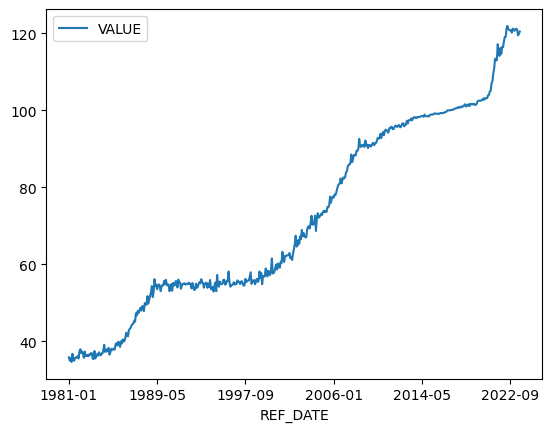

In [308]:
train_data[['REF_DATE', 'VALUE']].groupby('REF_DATE').median('VALUE').plot()

In [309]:
train_data[['Year', 'Month']] = train_data['REF_DATE'].str.split('-', expand=True)
train_data.drop(['REF_DATE', 'Month'], axis=1, inplace=True)

In [310]:
train_data['Year']=train_data['Year'].astype(int)

In [311]:
train_data

,COORDINATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),VALUE,Year
105,36.1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,35.8,1981
0,1.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,38.2,1981
104,35.3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,19.4,1981
76,26.2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,64.9,1981
106,36.2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,36.5,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61434,39.1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,129.1,2023
61352,11.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,121.3,2023
61394,25.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,118.5,2023
61360,14.2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,112.9,2023


In [312]:
median_house_price_by_year = train_data.groupby('Year')['VALUE'].median().reset_index()

In [313]:
median_house_price_by_year

,Year,VALUE
0,1981,35.60
1,1982,36.30
2,1983,36.45
3,1984,37.30
4,1985,38.60
5,1986,41.60
6,1987,47.00
7,1988,50.60
8,1989,54.40
9,1990,54.70


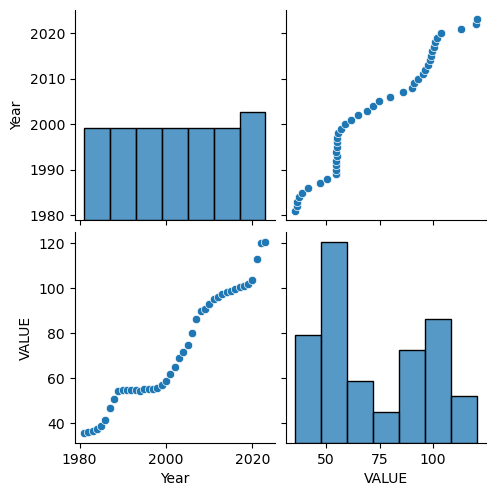

In [314]:
sns.pairplot(median_house_price_by_year)
plt.show()

array([[<Axes: title={'center': 'COORDINATE'}>,
        <Axes: title={'center': 'Alberta'}>,
        <Axes: title={'center': 'Atlantic Region'}>,
        <Axes: title={'center': 'British Columbia'}>,
        <Axes: title={'center': 'Calgary, Alberta'}>,
        <Axes: title={'center': 'Charlottetown, Prince Edward Island'}>,
        <Axes: title={'center': 'Edmonton, Alberta'}>],
       [<Axes: title={'center': 'Greater Sudbury, Ontario'}>,
        <Axes: title={'center': 'Guelph, Ontario'}>,
        <Axes: title={'center': 'Halifax, Nova Scotia'}>,
        <Axes: title={'center': 'Hamilton, Ontario'}>,
        <Axes: title={'center': 'Kelowna, British Columbia'}>,
        <Axes: title={'center': 'Kitchener-Cambridge-Waterloo, Ontario'}>,
        <Axes: title={'center': 'London, Ontario'}>],
       [<Axes: title={'center': 'Manitoba'}>,
        <Axes: title={'center': 'Montréal, Quebec'}>,
        <Axes: title={'center': 'New Brunswick'}>,
        <Axes: title={'center': 'Newfoundland 

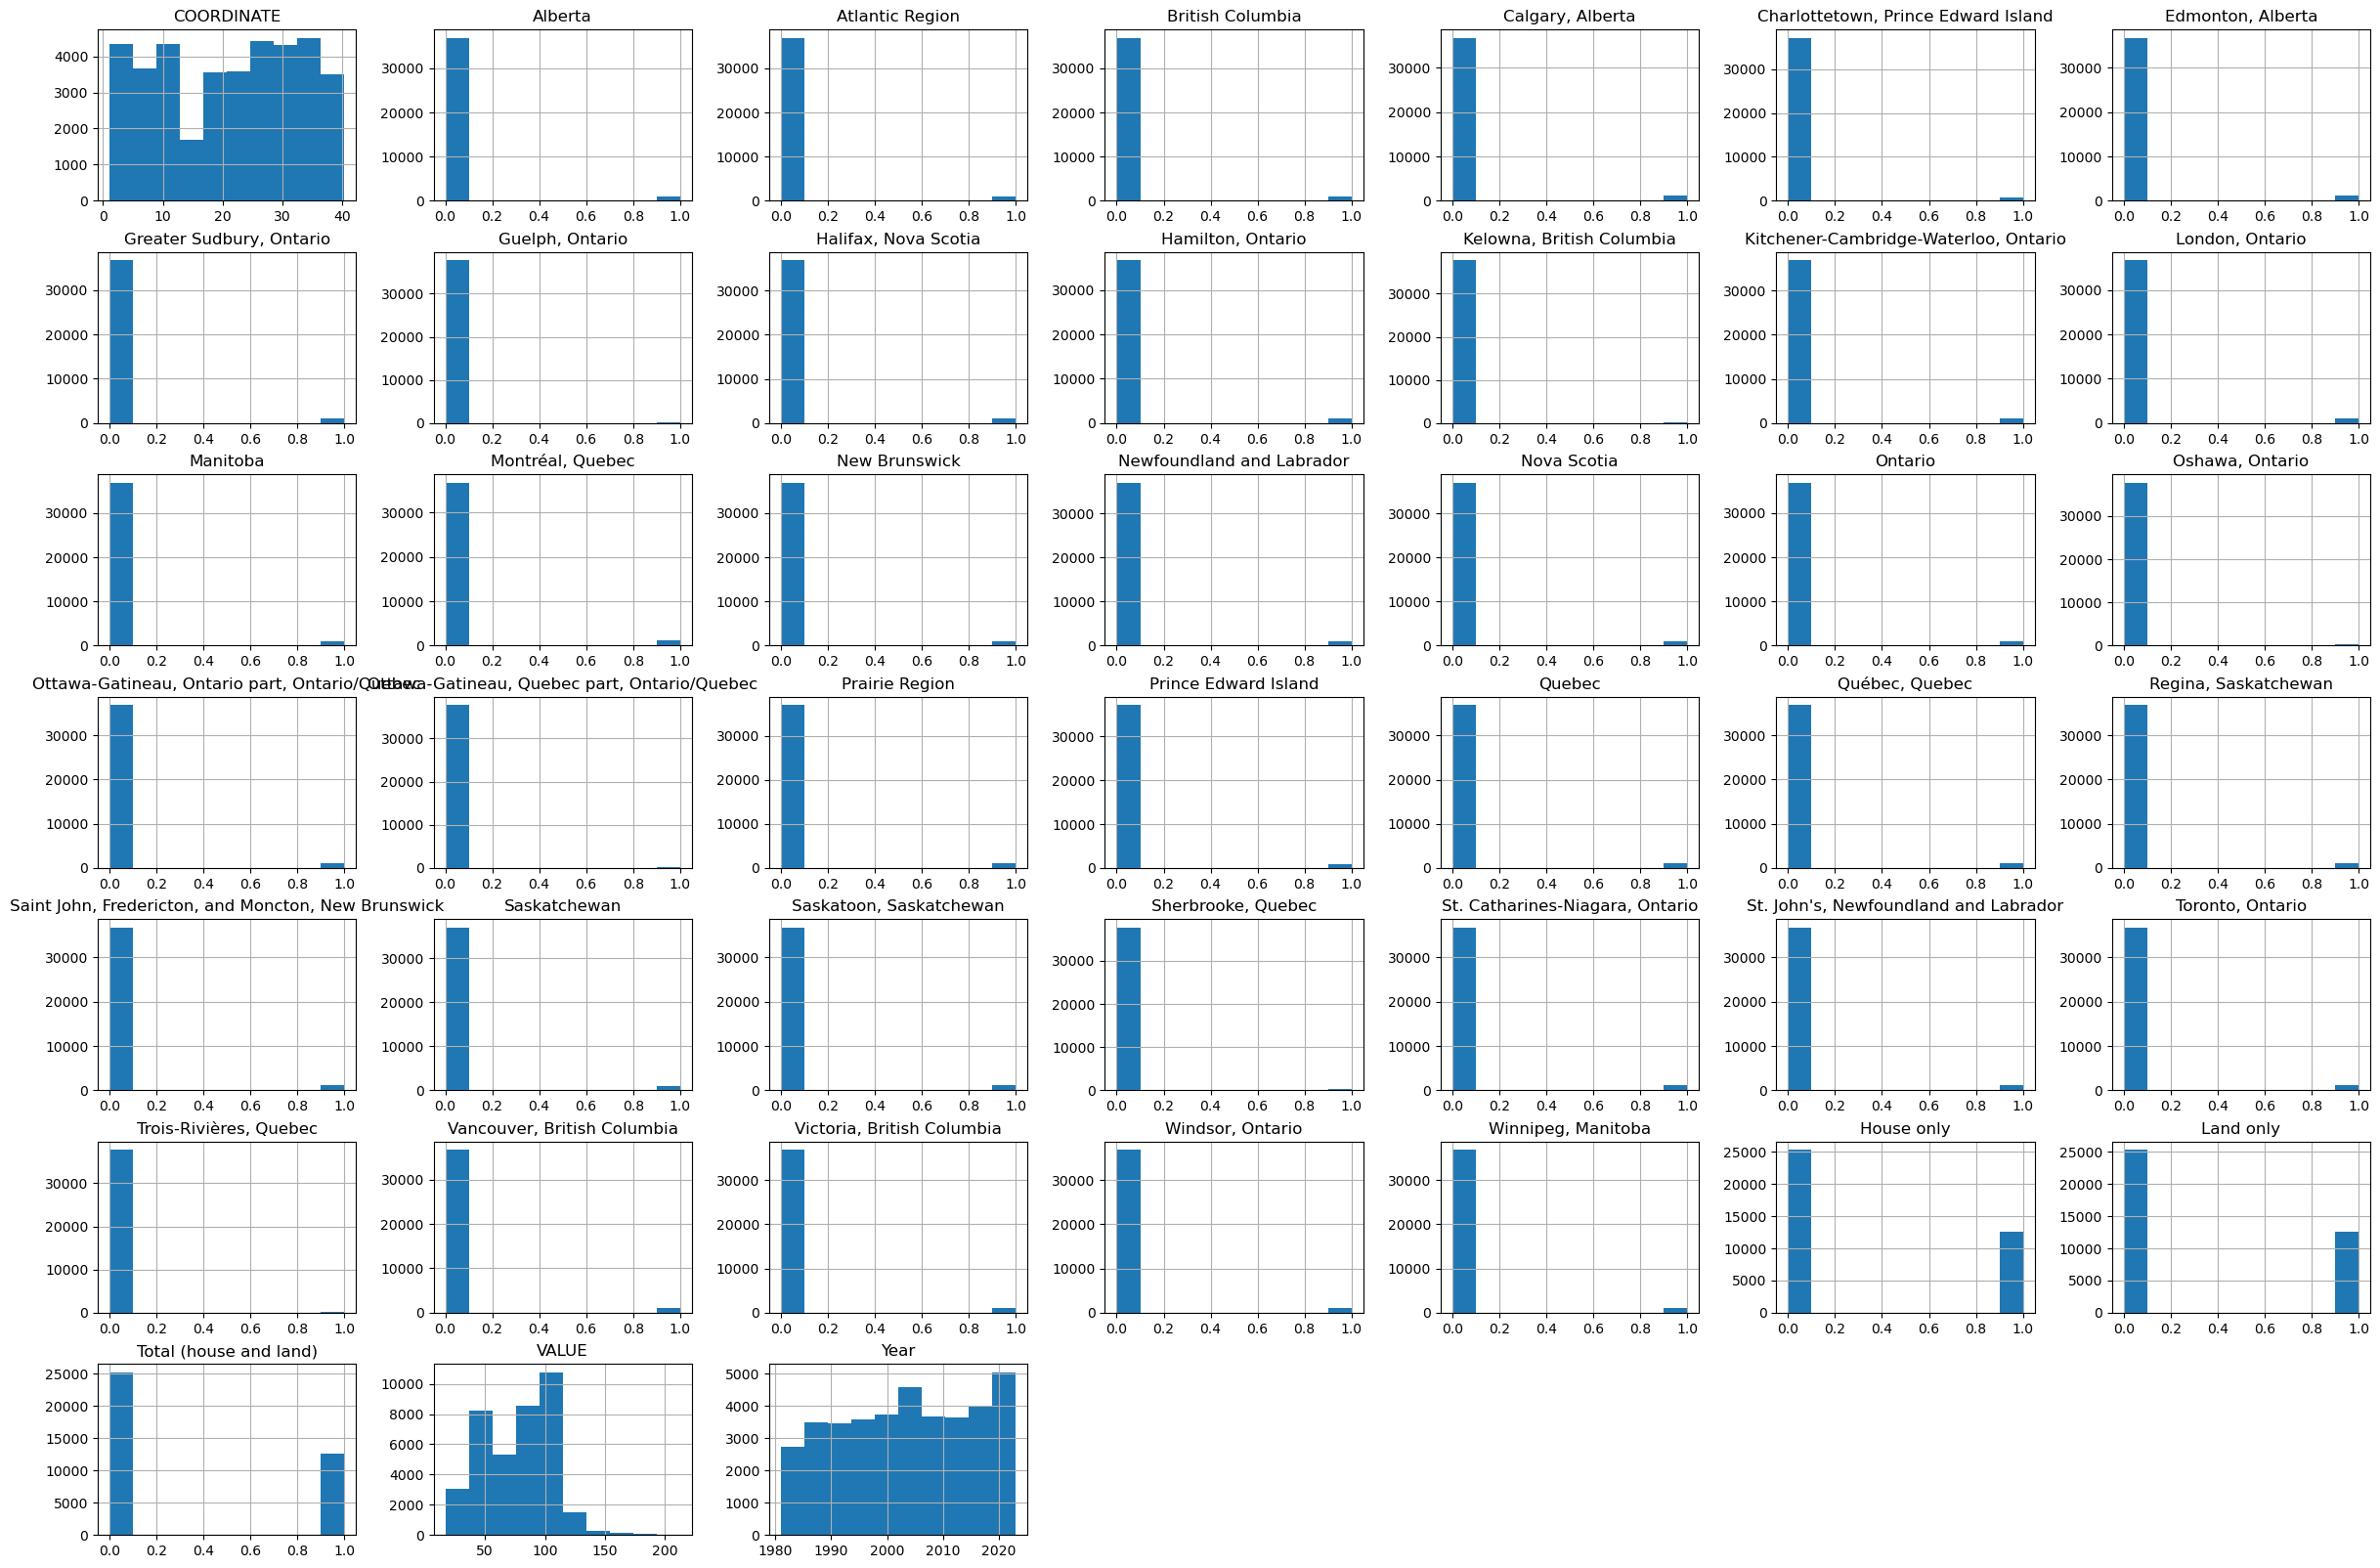

In [315]:
train_data.hist(figsize=(30,20))

In [316]:
train_data.corr()

,COORDINATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),VALUE,Year
COORDINATE,1.000000,0.186291,-0.266981,0.227045,0.211074,-0.183744,0.227566,0.092409,0.018708,-0.186589,...,-0.039588,0.272397,0.285371,0.076254,0.136027,0.000848,0.003384,-0.004228,-0.032002,-0.043560
Alberta,0.186291,1.000000,-0.028044,-0.027820,-0.029512,-0.024502,-0.029725,-0.029725,-0.011716,-0.028759,...,-0.011459,-0.029698,-0.029486,-0.029272,-0.029406,0.000952,-0.001248,0.000296,-0.052474,0.015607
Atlantic Region,-0.266981,-0.028044,1.000000,-0.027834,-0.029527,-0.024514,-0.029739,-0.029739,-0.011722,-0.028773,...,-0.011465,-0.029713,-0.029500,-0.029287,-0.029420,0.003926,-0.003763,-0.000161,0.003633,0.010615
British Columbia,0.227045,-0.027820,-0.027834,1.000000,-0.029292,-0.024319,-0.029502,-0.029502,-0.011629,-0.028544,...,-0.011373,-0.029476,-0.029265,-0.029053,-0.029186,-0.001811,-0.001950,0.003757,0.087001,0.010730
"Calgary, Alberta",0.211074,-0.029512,-0.029527,-0.029292,1.000000,-0.025798,-0.031297,-0.031297,-0.012336,-0.030280,...,-0.012065,-0.031269,-0.031045,-0.030820,-0.030961,0.001478,0.001003,-0.002479,-0.108839,-0.024568
"Charlottetown, Prince Edward Island",-0.183744,-0.024502,-0.024514,-0.024319,-0.025798,1.000000,-0.025984,-0.025984,-0.010242,-0.025140,...,-0.010017,-0.025961,-0.025775,-0.025588,-0.025705,0.001272,-0.001191,-0.000081,0.087188,0.063831
"Edmonton, Alberta",0.227566,-0.029725,-0.029739,-0.029502,-0.031297,-0.025984,1.000000,-0.031522,-0.012425,-0.030498,...,-0.012152,-0.031494,-0.031269,-0.031042,-0.031184,0.001689,-0.004306,0.002615,-0.061238,-0.021938
"Greater Sudbury, Ontario",0.092409,-0.029725,-0.029739,-0.029502,-0.031297,-0.025984,-0.031522,1.000000,-0.012425,-0.030498,...,-0.012152,-0.031494,-0.031269,-0.031042,-0.031184,0.001364,-0.005280,0.003912,0.059664,-0.027761
"Guelph, Ontario",0.018708,-0.011716,-0.011722,-0.011629,-0.012336,-0.010242,-0.012425,-0.012425,1.000000,-0.012021,...,-0.004790,-0.012414,-0.012325,-0.012236,-0.012292,0.001181,0.002728,-0.003905,0.089958,0.095863
"Halifax, Nova Scotia",-0.186589,-0.028759,-0.028773,-0.028544,-0.030280,-0.025140,-0.030498,-0.030498,-0.012021,1.000000,...,-0.011757,-0.030471,-0.030253,-0.030034,-0.030171,-0.004643,0.004260,0.000381,-0.000272,-0.006145


<Axes: >

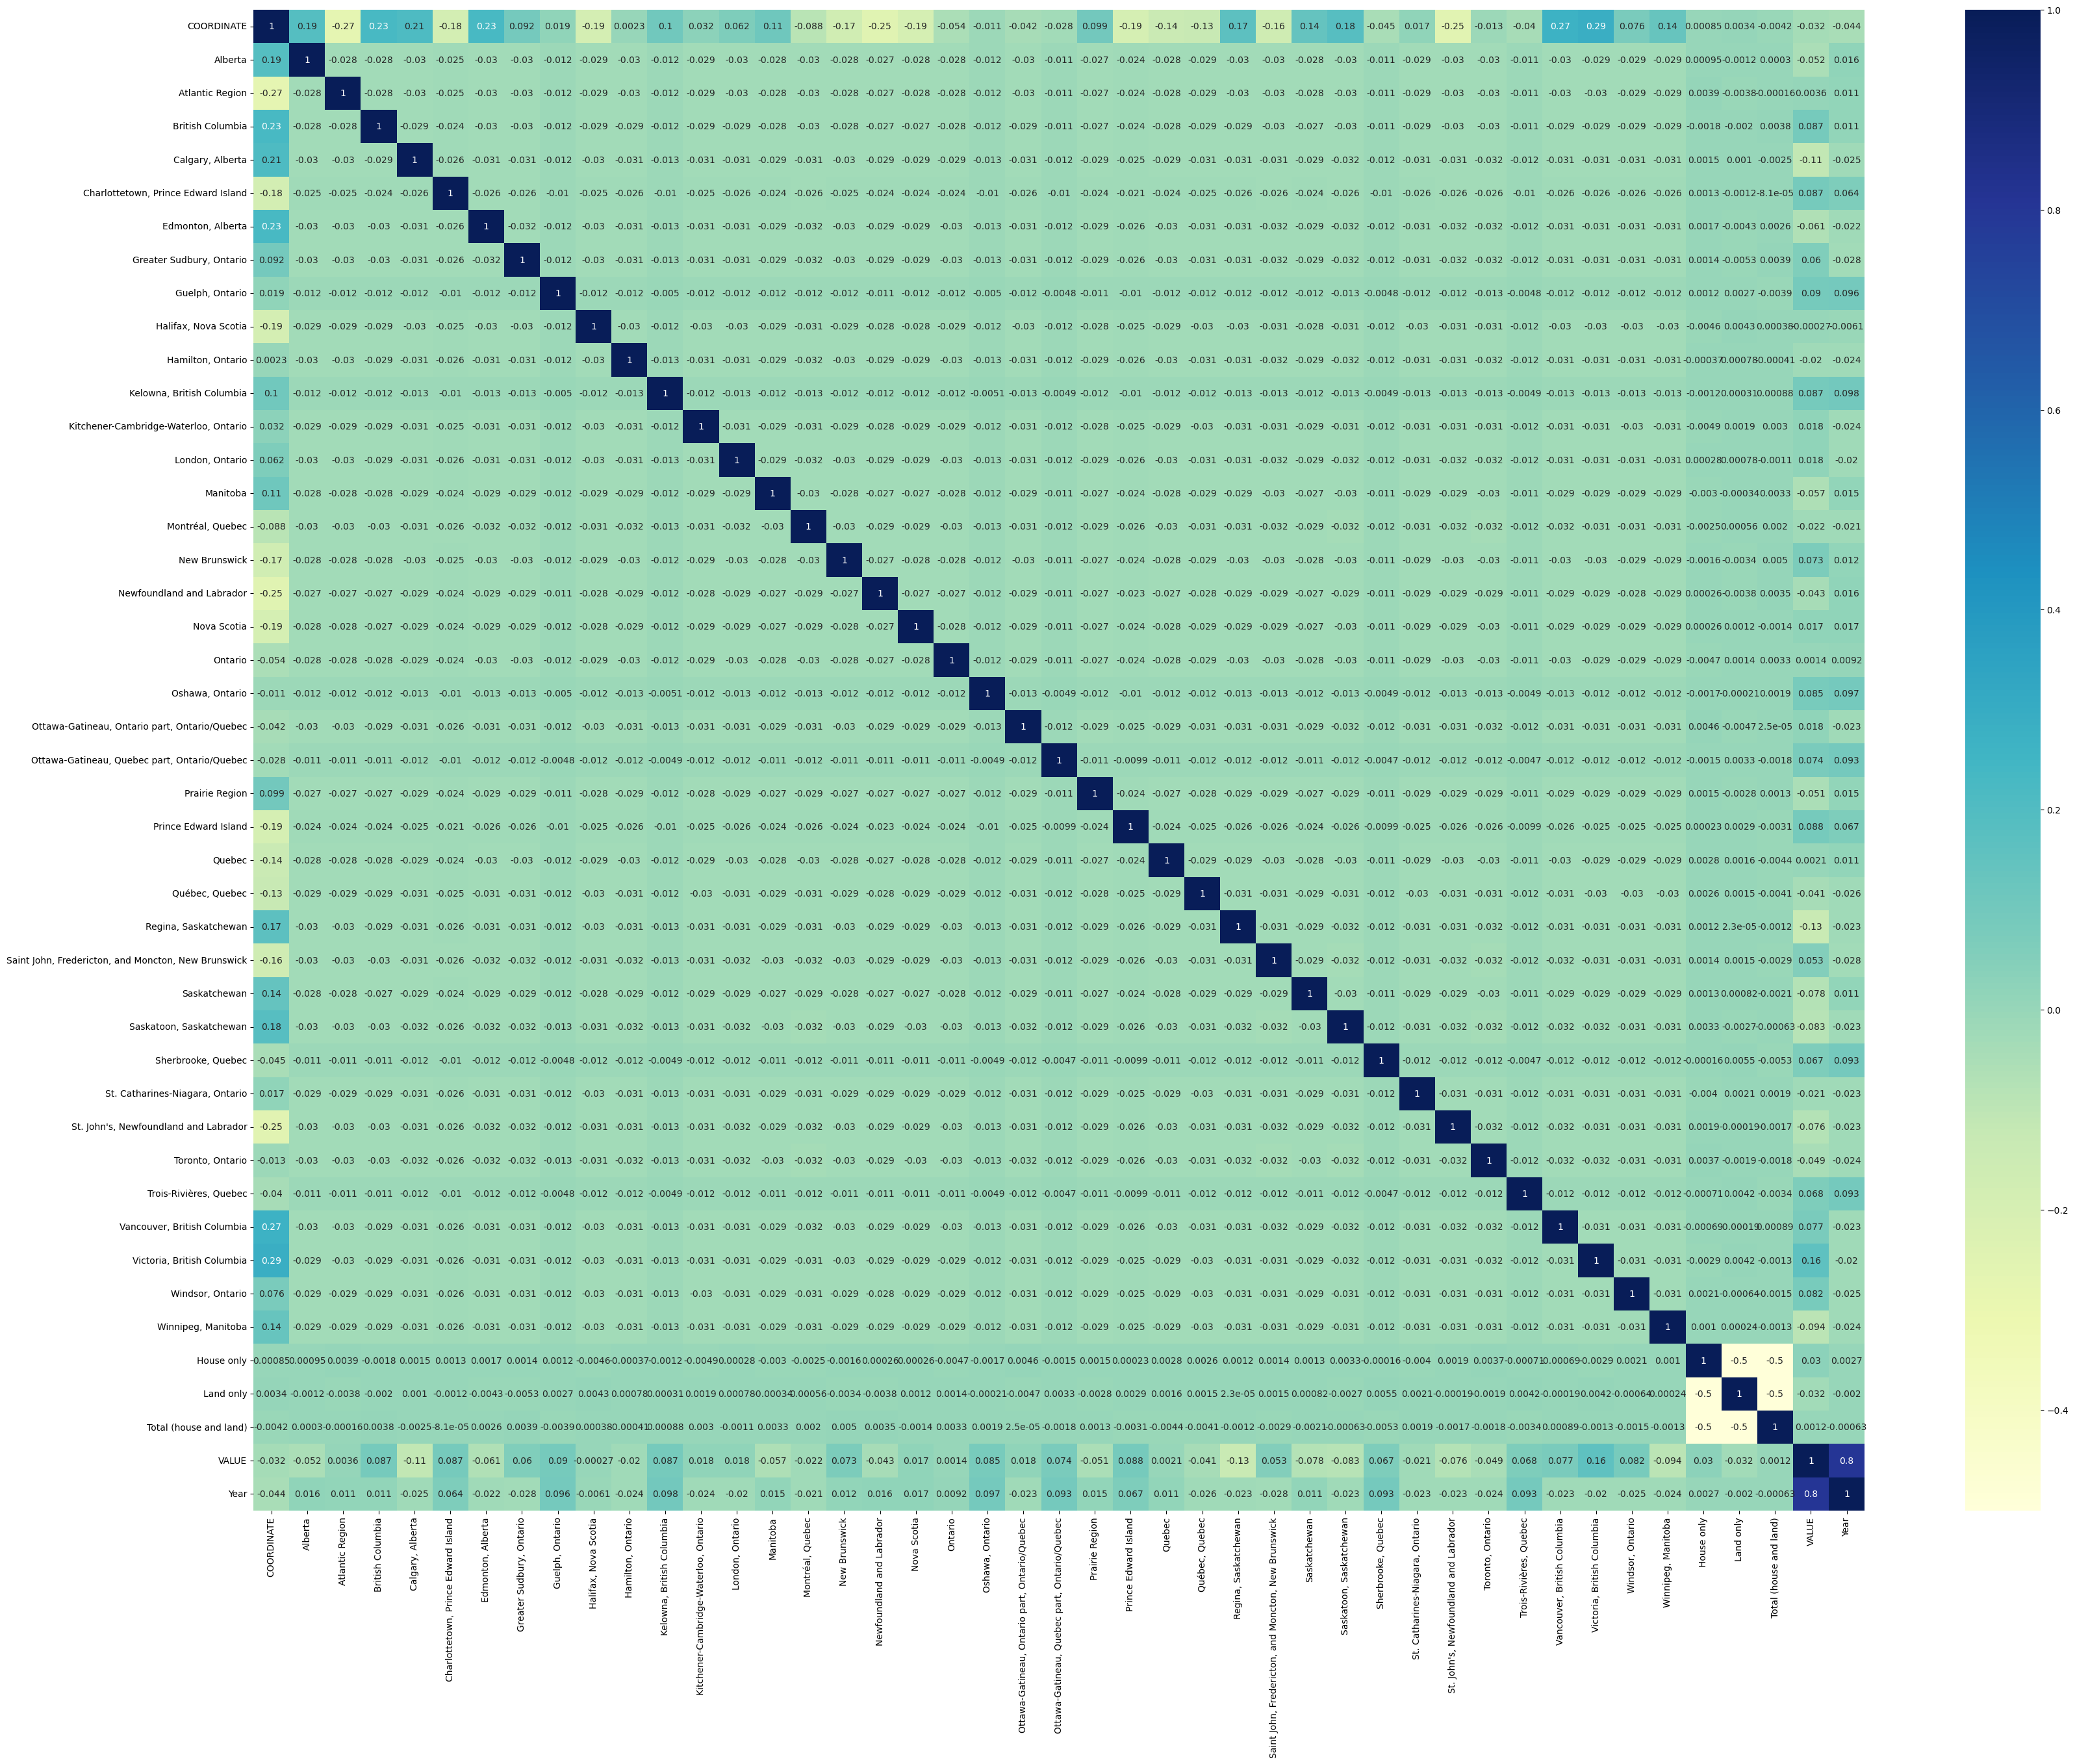

In [317]:
plt.figure(figsize=(40,30))
sns.heatmap(train_data.corr(),annot = True, cmap = 'YlGnBu')

In [318]:
corr_matrix = housing_data.corr()
print(corr_matrix['VALUE'].sort_values(ascending=False))

VALUE                                                  1.000000
Victoria, British Columbia                             0.167480
British Columbia                                       0.089252
Guelph, Ontario                                        0.087619
Charlottetown, Prince Edward Island                    0.087519
Prince Edward Island                                   0.087519
Oshawa, Ontario                                        0.083156
Kelowna, British Columbia                              0.082686
Windsor, Ontario                                       0.082586
Vancouver, British Columbia                            0.076058
Ottawa-Gatineau, Quebec part, Ontario/Quebec           0.075818
New Brunswick                                          0.073242
Trois-Rivières, Quebec                                 0.069016
Sherbrooke, Quebec                                     0.068193
Greater Sudbury, Ontario                               0.060754
Saint John, Fredericton, and Moncton, Ne

/var/folders/03/bty7rrx95s357qd76vn6pqc80000gn/T/ipykernel_9199/2095488185.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = housing_data.corr()


In [334]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train, y_train, = train_data.drop(['VALUE'], axis = 1), train_data['VALUE']
X_train_s = scaler.fit_transform(X_train)

model = LinearRegression()

In [335]:
model.fit(X_train_s, y_train)

LinearRegression()

In [336]:
test_data = X_train.join(y_train)

In [337]:
test_data

,COORDINATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),Year,VALUE
105,36.1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,1981,35.8
0,1.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1981,38.2
104,35.3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1981,19.4
76,26.2,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1981,64.9
106,36.2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,1981,36.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61434,39.1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2023,129.1
61352,11.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2023,121.3
61394,25.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,2023,118.5
61360,14.2,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,2023,112.9


In [338]:
X_test, y_test = test_data.drop(['VALUE'], axis=1), test_data['VALUE']

In [339]:
X_test

,COORDINATE,Alberta,Atlantic Region,British Columbia,"Calgary, Alberta","Charlottetown, Prince Edward Island","Edmonton, Alberta","Greater Sudbury, Ontario","Guelph, Ontario","Halifax, Nova Scotia",...,"Toronto, Ontario","Trois-Rivières, Quebec","Vancouver, British Columbia","Victoria, British Columbia","Windsor, Ontario","Winnipeg, Manitoba",House only,Land only,Total (house and land),Year
105,36.1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,1981
0,1.1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1981
104,35.3,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1981
76,26.2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1981
106,36.2,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61434,39.1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2023
61352,11.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2023
61394,25.3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,2023
61360,14.2,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,2023


In [340]:
X_test_s = scaler.transform(X_test)

In [344]:
r_sq= model.score(X_test_s, y_test)

In [346]:
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")

coefficient of determination: 0.7833062226324314
intercept: 76.8203808952573
slope: [-3.94969758e+10  1.79533695e+10  5.44296889e+08  1.94470009e+10
  1.94183280e+10  2.39325716e+09  2.01243819e+10  1.49495409e+10
  5.35078548e+09  3.90177694e+09  1.14756158e+10  8.81362739e+09
  1.23932051e+10  1.37880495e+10  1.51110181e+10  8.07993171e+09
  4.35437511e+09  1.05693120e+09  3.22256803e+09  8.69648514e+09
  4.24350190e+09  9.71327467e+09  3.41371857e+09  1.43396177e+10
  1.89210101e+09  5.43018604e+09  6.17494259e+09  1.77274231e+10
  5.18778405e+09  1.61361447e+10  1.85371044e+10  2.73864236e+09
  1.19733372e+10  1.72566693e+09  1.10018827e+10  2.95855609e+09
  2.18310784e+10  2.22550902e+10  1.41688711e+10  1.65064715e+10
  6.21117408e+12  6.21318015e+12  6.21960140e+12  2.21947729e+01]


## Forest Regressor

In [207]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train_s, y_train)

RandomForestRegressor()

In [208]:
forest.score(X_test_s, y_test)

0.997072304055588